<a href="https://colab.research.google.com/github/yaduvamsikrishna2004/Pothole-Dectection_cnn/blob/main/pothole_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pothole_dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_data = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/pothole_dataset/validation',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/pothole_dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 384 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 139s 12s/step - accuracy: 0.5262 - loss: 0.8284 - val_accuracy: 0.5132 - val_loss: 0.6873
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5390 - loss: 0.6910 - val_accuracy: 0.5556 - val_loss: 0.6358
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6759 - loss: 0.6111 - val_accuracy: 0.8201 - val_loss: 0.4429
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8012 - loss: 0.4478 - val_accuracy: 0.8519 - val_loss: 0.3508
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8078 - loss: 0.3996 - val_accuracy: 0.8254 - val_loss: 0.3849
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8284 - loss: 0.4401 - val_accuracy: 0.8677 - val_loss: 0.3148
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8598 - loss: 0.3468 - val_accuracy: 0.8836 - val_loss: 0.2834
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8728 - loss: 0.3133 - val_accuracy: 0.8942 - val_los

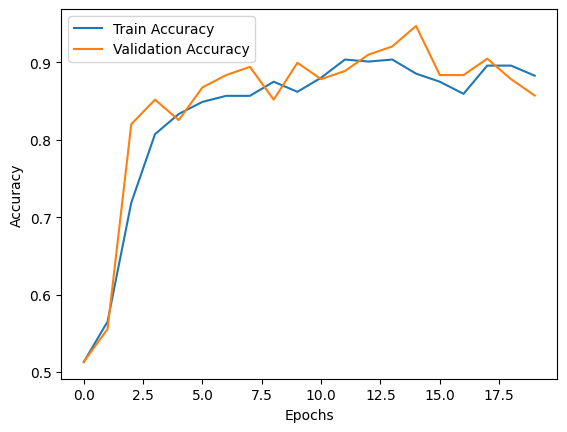

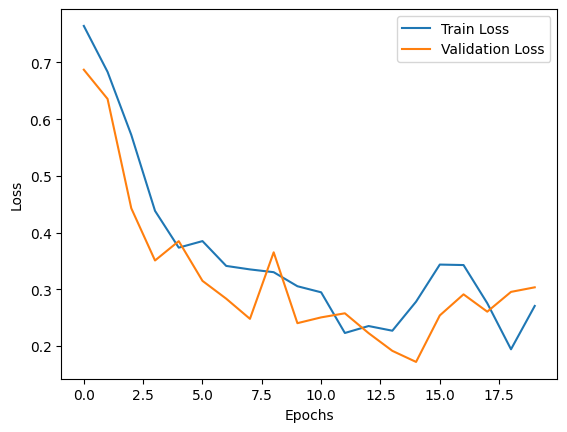

In [5]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step


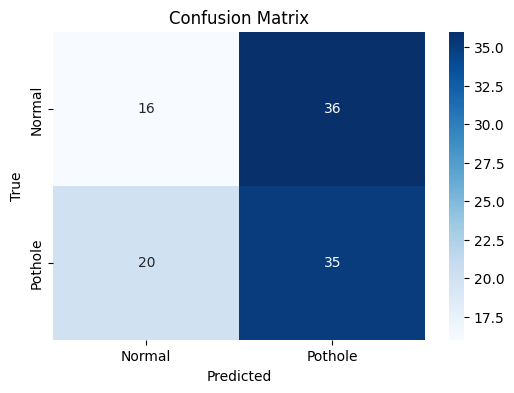

              precision    recall  f1-score   support

      Normal       0.44      0.31      0.36        52
     Pothole       0.49      0.64      0.56        55

    accuracy                           0.48       107
   macro avg       0.47      0.47      0.46       107
weighted avg       0.47      0.48      0.46       107



In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions on test set
y_pred = model.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)  # binary threshold

# True labels
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Pothole'],
            yticklabels=['Normal','Pothole'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Detailed classification report
print(classification_report(y_true, y_pred_classes, target_names=['Normal','Pothole']))


In [7]:
model.save("/content/drive/MyDrive/pothole_cnn_model.h1")
print("✅ Model saved to Google Drive")


✅ Model saved to Google Drive


In [8]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np # Import numpy

# Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Preprocess
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🚧 Pothole detected!")
else:
    print("✅ Normal road")

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
🚧 Pothole detected!
